# Titanic: Machine Learning from Disaster

### Table of content

1. **Introduction**<br>
2. **Load and Describe Data**<br>
    2.1 Load Data<br>
    2.2 Data Description<br>
    2.3 Check Null and Missing Values<br>
3. **Exploratory Data Analysis**<br>
    3.1 Numerical  Data Correlatio<br>
    3.2 Numerica Analysis and Visualization<br>
    3.3 Categorical Analysis and Visualizations<br>
4. **Feature engineering**<br>
    4.1 Filling Missing Values<br>
    4.2 Convert Categorical to One Hot Encoding<br>
    4.3 Drop Some Feature<br>
    4.4 Add Some Feature<br>
5. **Preprocessing**<br>
6. **Modeling**<br>
    6.1 Support Vector Machine (SVM)<br>
    6.2 Gradient Boosting<br>
    6.3 Random Forest<br>
    6.4 Logistic Regression<br>
    6.5 KNN Classifier<br>
    6.6 AdaBoost Classifier<br>
    6.7 XGBoost<br>
    6.8 Artificial Neural Network (ANN)<br>
    6.9 Result Modeling<br>
6. **Testing**<br>

### 1. Introduction

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

In this competitions we should analysis data to predict "survived" people on titanic disaster. we'll to apply the tool of machine learning to predict which passengers survived the tragedy.<br>

$\textbf{Arif Romadhan}$ <br>
email : arifromadhan19@gmail.com<br><br>
[Link my kernel](https://www.kaggle.com/arifromadhan19/titanic-machine-learning-from-disaster)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

import xgboost as xgb

import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


### 2. Load and Describe Data

### 2.1 Load Data

In [2]:
#Load Data
train = pd.read_csv("dataset/train.csv")

In [3]:
# Print some data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.2 Data Description

| Variable | Definition | Key   |
|------|------|------|
|   Survival  | Survival| 0 = No, 1 = Yes|
|   pclass  | Ticket class| 1 = 1st (Upper), 2 = 2nd (middle), 3 = 3rd (lower)|
|   sex  | sex|  Sibling = brother, sister, stepbrother, stepsister; Spouse = husband, wife (mistresses and fiancés were ignored)|
|   Age  | Age in years|  |	
|   sibsp  | # of siblings / spouses aboard the Titanic|  |	
|   parch  | # of parents / children aboard the Titanic|  |	
|   ticket  | Ticket number|  |	
|   fare	| Passenger fare |  |			
|   cabin	| Cabin number |  |			
|   embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |	

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### 2.3 Check Null and Missing Values

In [5]:
# Fill empty and NaNs values with NaN
train = train.fillna(np.nan)

# Check for Null values
train_null = train.isnull().sum(axis = 0)
train_null

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 3. Exploratory Data Analysis

### 3.1 Numerical  Data Correlation

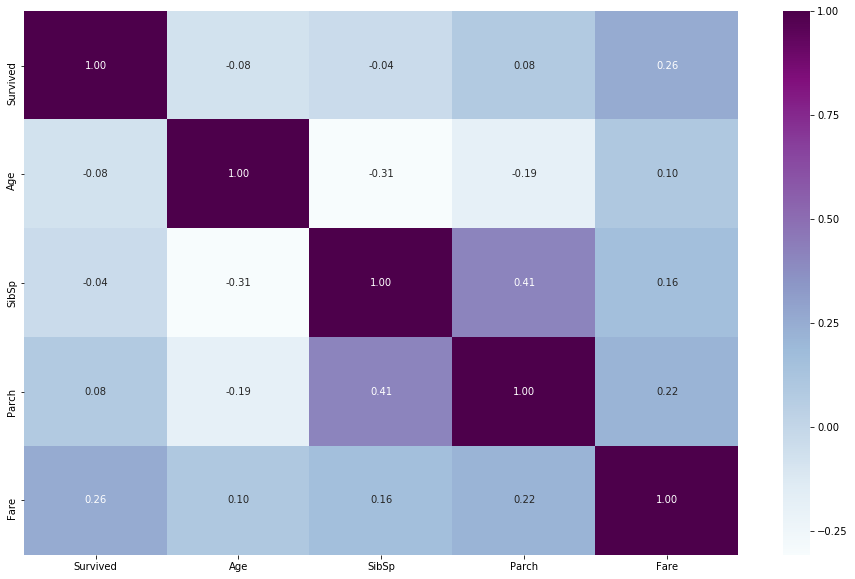

In [6]:
corr_ =train[["Survived","Age","SibSp","Parch","Fare"]].corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

**Fare values has significant correlation with survival probability than other**

### 3.2 Numerical  Analysis and Visualization

### **Explore Survival Rate by Age**

Text(0.5,1,'Survival Rate by Age')

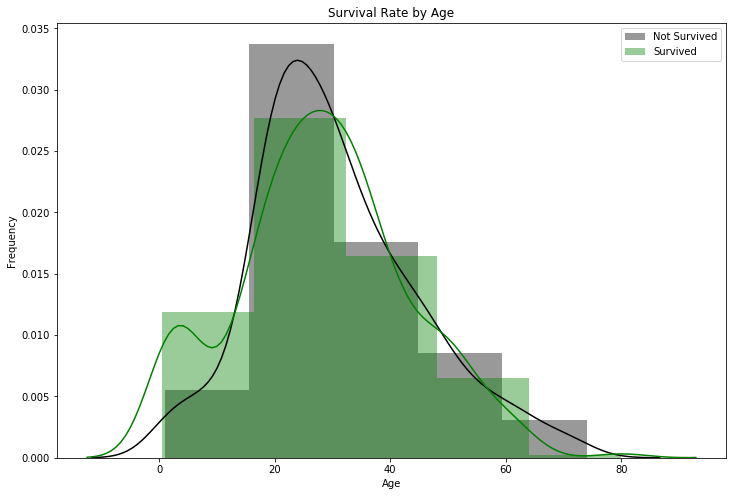

In [7]:
fig, ax = plt.subplots(figsize=(12,8))
g = sns.distplot(train[train['Survived']==0]['Age'].dropna(),ax=ax,kde=True,color='black',bins=5)
g = sns.distplot(train[train['Survived']==1]['Age'].dropna(),ax=ax,kde=True,color='g',bins=5)
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])
ax.set_title('Survival Rate by Age')

**Age distribution seems that passengers between 60-80 have less survived. While young passengers have more chance to survive most and they are the most survivors of titanic disaster**

### **Explore Survival Rate by SibSp (Siblings or Spouse)**

Text(0,0.5,'Survival Probability')

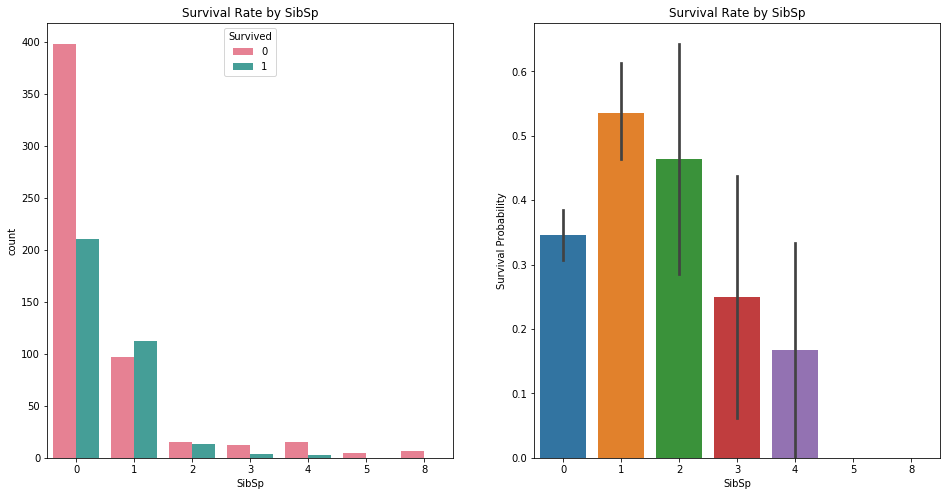

In [8]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
g = sns.countplot('SibSp',hue='Survived',data=train,ax=ax1,palette='husl')
ax1.set_title('Survival Rate by SibSp')

g = sns.barplot(x="SibSp",y="Survived",data=train, ax=ax2)
ax2.set_title('Survival Rate by SibSp')
ax2.set_xlabel('SibSp')
ax2.set_ylabel('Survival Probability')

**If we analysis based on the figure. it means that passengers having a lot of siblings/spouses have less chance to survive**

### **Explore Survival Rate by Parch (parents or children)**

Text(0,0.5,'Survival Probability')

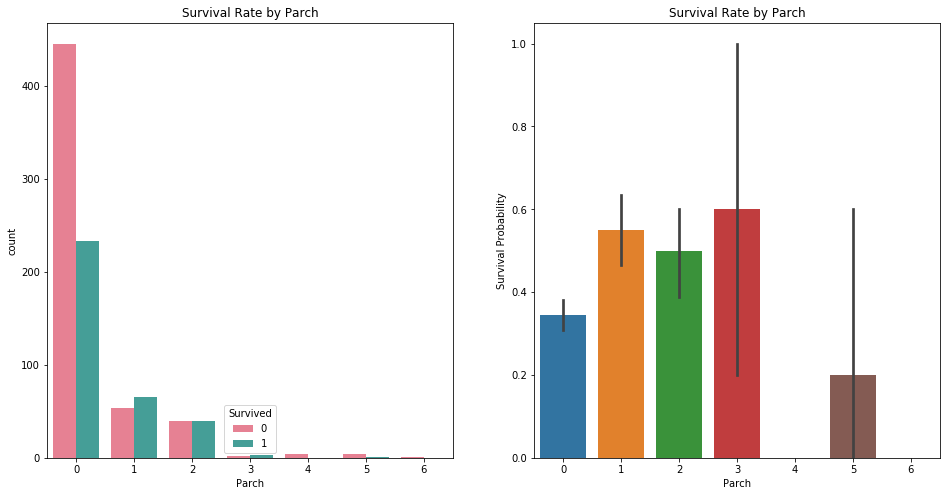

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
g = sns.countplot('Parch',hue='Survived',data=train,ax=ax1,palette='husl')
ax1.set_title('Survival Rate by Parch')

g = sns.barplot(x="Parch",y="Survived",data=train, ax=ax2)
ax2.set_title('Survival Rate by Parch')
ax2.set_xlabel('Parch')
ax2.set_ylabel('Survival Probability')

**we can analysis the figure above that small family have chance to survive**

### **Explore Survival Rate by Fare **

average Fare in Pclass 1 :  84.15468749999992
average Fare in Pclass 2 :  20.66218315217391
average Fare in Pclass 3 :  13.675550101832997


[Text(0,0,'Pclass 1'), Text(0,0,'Pclass 2'), Text(0,0,'Pclass 3')]

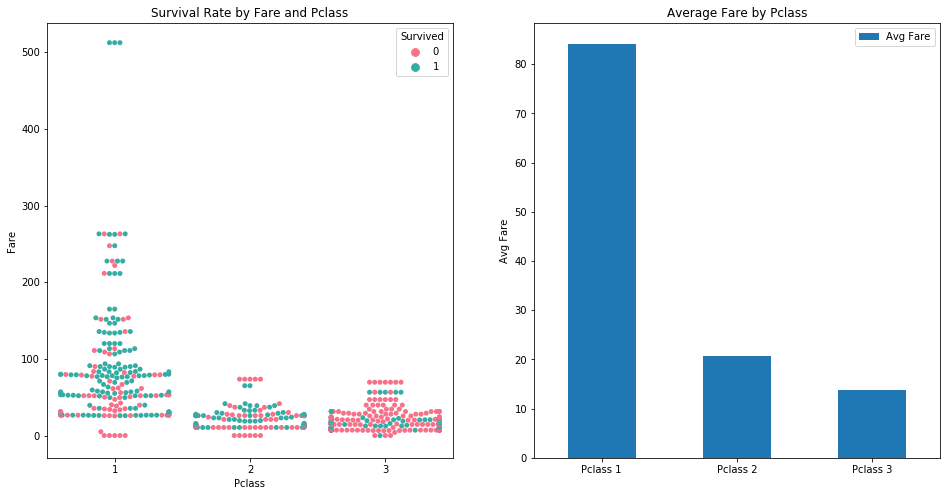

In [10]:
avg_fare_1 = train.Fare[train.Pclass==1].mean()
print('average Fare in Pclass 1 : ', avg_fare_1)

avg_fare_2 = train.Fare[train.Pclass==2].mean()
print('average Fare in Pclass 2 : ', avg_fare_2)

avg_fare_3 = train.Fare[train.Pclass==3].mean()
print('average Fare in Pclass 3 : ', avg_fare_3)

avg_fare_pclass = pd.DataFrame({
    'Pclass': ['average Fare in Pclass 1', 'average Fare in Pclass 1', 'average Fare in Pclass 1'],
    'Fare': [avg_fare_1,avg_fare_2,avg_fare_3
             ]  
            })
avg_fare_pclass['Fare'] = np.round(avg_fare_pclass['Fare'], decimals = 4)
avg_fare_pclass.sort_values(by='Fare', ascending=False)


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
g = sns.swarmplot(x='Pclass',y='Fare',hue='Survived',data=train,palette='husl', ax=ax1)
ax1.set_title('Survival Rate by Fare and Pclass')

ax2 = avg_fare_pclass[['Fare']].plot(kind='bar', title ="Average Fare by Pclass", legend=True, ax=ax2)

ax2.set_ylabel("Avg Fare")
ax2.legend(["Avg Fare"])
ax2.set_xticklabels(['Pclass 1','Pclass 2','Pclass 3'], rotation='horizontal')

**People who have expensive fare and they are in Pclass 1 are the most survivors of titanic disaster**

Text(0.5,1,'Survival Rate by Age')

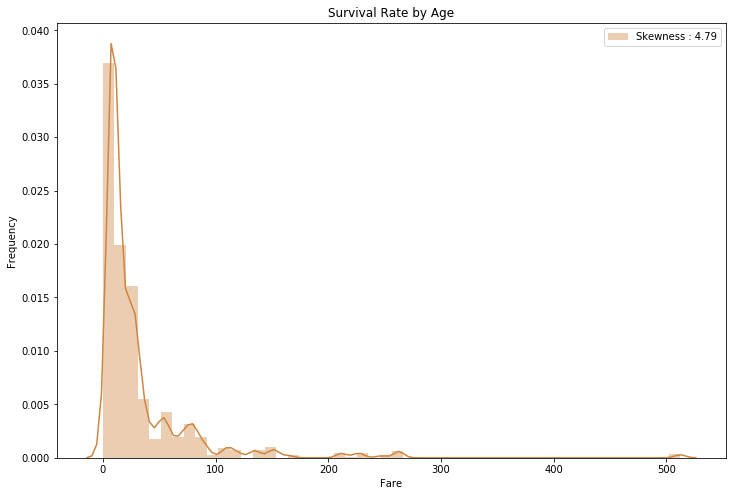

In [11]:
fig, ax = plt.subplots(figsize=(12,8))
g = sns.distplot(train['Fare'], color='peru', label="Skewness : %.2f"%(train["Fare"].skew()))
g = g.legend(loc="best")
ax.set_xlabel('Fare')
ax.set_ylabel('Frequency')
ax.set_title('Survival Rate by Age')

**Fare distribution is very skewed**

### 3.3 Categorical Analysis and Visualization

### **Explore Survival Rate by Sex**

Text(0,0.5,'Survival Probability')

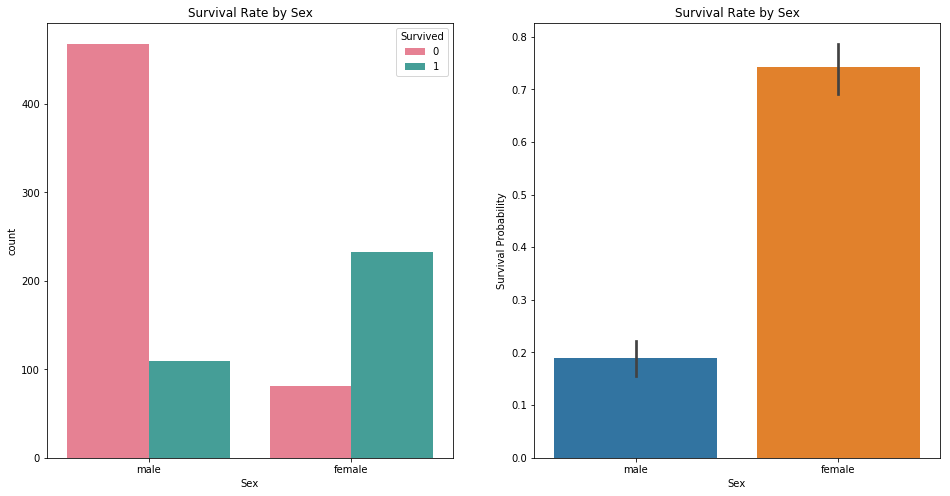

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
g = sns.countplot('Sex',hue='Survived',data=train,ax=ax1,palette='husl')
ax1.set_title('Survival Rate by Sex')

g = sns.barplot(x="Sex",y="Survived",data=train, ax=ax2)
ax2.set_title('Survival Rate by Sex')
ax2.set_xlabel('Sex')
ax2.set_ylabel('Survival Probability')

**If we analysis based on the figure, Female have chance to survive than male**

### **Explore Survival Rate by Pclass**

Text(0,0.5,'Survival Probability')

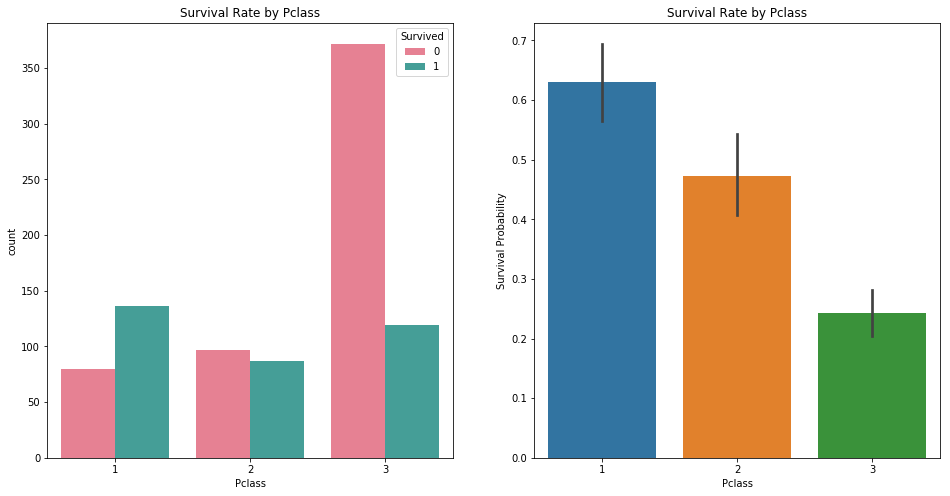

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
g = sns.countplot('Pclass',hue='Survived',data=train,ax=ax1,palette='husl')
ax1.set_title('Survival Rate by Pclass')

g = sns.barplot(x="Pclass",y="Survived",data=train, ax=ax2)
ax2.set_title('Survival Rate by Pclass')
ax2.set_xlabel('Pclass')
ax2.set_ylabel('Survival Probability')

**As we can see, people in the first class (Pclass = 1) have chance to survive than other and people in the third class (Pclass = 3) have less chance to survive.**

### **Explore Survival Rate by Embarked**

Text(0,0.5,'Survival Probability')

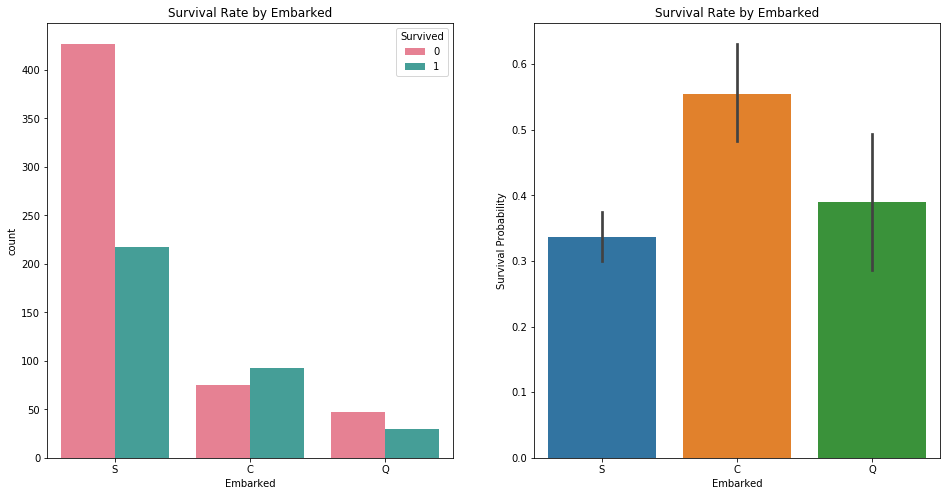

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
g = sns.countplot('Embarked',hue='Survived',data=train,ax=ax1,palette='husl')
ax1.set_title('Survival Rate by Embarked')

g = sns.barplot(x="Embarked",y="Survived",data=train, ax=ax2)
ax2.set_title('Survival Rate by Embarked')
ax2.set_xlabel('Embarked')
ax2.set_ylabel('Survival Probability')

**based on number, many people survived from embarked S. But based on probabilty, people in the embarked C have chance to survive than other.**

### **Explore Survival Rate by Cabin**

In [15]:
cabin = train.Cabin
unique_cabin = cabin.drop_duplicates()
len(unique_cabin)

148

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146]), <a list of 147 Text xticklabel objects>)

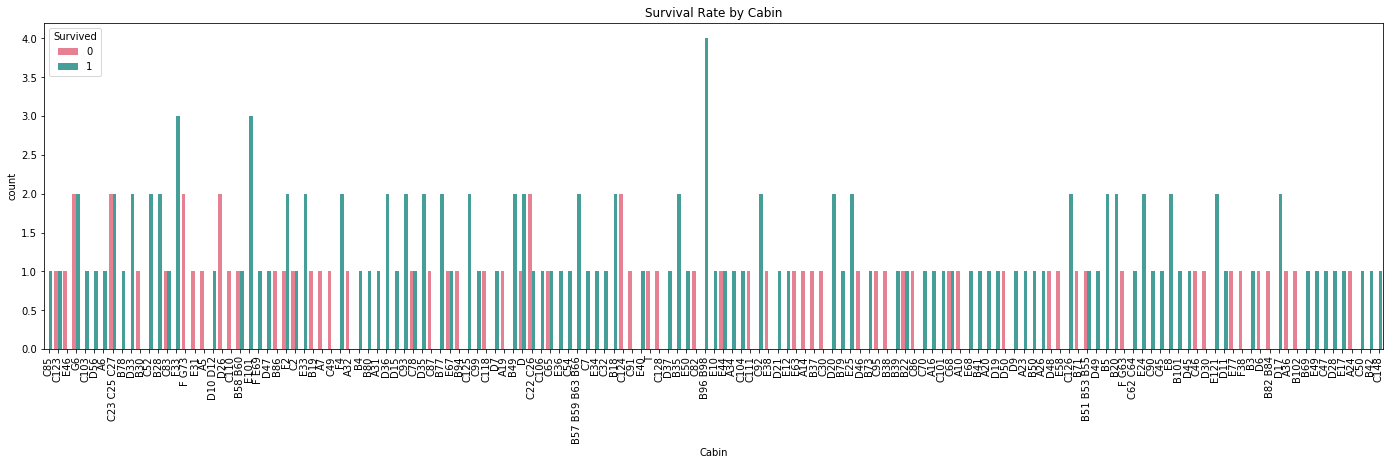

In [16]:
fig, ax1 = plt.subplots(figsize=(24,6))
g = sns.countplot('Cabin',hue='Survived',data=train,ax=ax1,palette='husl')
ax1.set_title('Survival Rate by Cabin')
plt.xticks(rotation=90)

**As we can see, cabin data have many category (148 category). I'll drop cabin in dataset**

### 4. Feature Engineering

### 4.1 Filling Missing Values

**Filling Missing Age Values**

As we know, Age column contains 177 missing values in the whole data train. If we analysis numerical correlation at poin 3.1 Numerical Data Correlation. we found correlation between Age and Fare, but too many variance in Fare value. If we analysis at point 3.2 Numerical Analysis and Visualization (Explore Survival Rate by Fare), there is correlation between Fare and Pclass. So, i decided to use Pclass in order to impute the missing ages.

In [17]:
## Fill Age with the median age of similar rows according to Pclass

index_NaN_age = list(train["Age"][train["Age"].isnull()].index)

for i in index_NaN_age :
    age_med = train["Age"].median()
    age_pred = train["Age"][((train['Pclass'] == train.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred) :
        train['Age'].iloc[i] = age_pred
    else :
        train['Age'].iloc[i] = age_med
        

/home/arif/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


**Filling Missing Embarked Values**

If we analysis at point 3.3 Categorical Analysis and Visualization (Explore Survival Rate by Pclass), people in the first class are the most survivors. Result at point 3.3  Categorical Analysis and Visualization (Explore Survival Rate by Embarked), Embarked S have a highest number than other. My hypothesis is that the proportion of first class passengers is higher for those who came from Southampton(S) than Queenstown (Q), Cherbourg (C). However, I can't explain why Embarked S (Southampton) have the lowest probability than Queenstown (Q), Cherbourg (C). But I decided to use zero in order to impute the missing embarked.

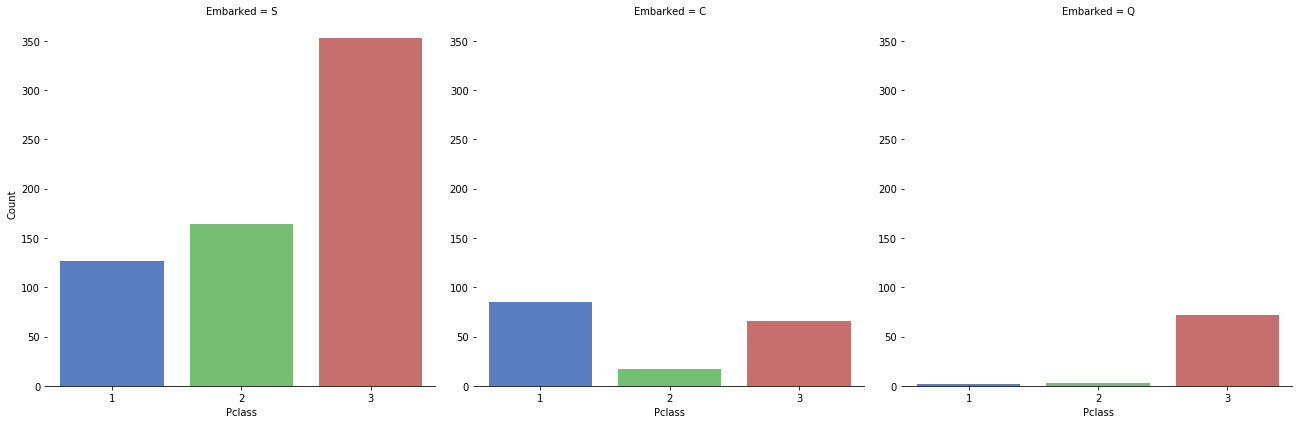

In [18]:
# Explore Pclass vs Embarked 
g = sns.factorplot("Pclass", col="Embarked",  data=train,
                   size=6, kind="count", palette="muted")
g.despine(left=True)
g = g.set_ylabels("Count")

In [19]:
## Before we fill Embarked with zero, we change Embarked values to one hot encoding 
train["Embarked"] = train["Embarked"].astype("category")
train = pd.get_dummies(train, columns = ["Embarked"],prefix="Embarked")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1


In [20]:
## Fill Embarked with zero value
train['Embarked_C'] = train['Embarked_C'].fillna(0)
train['Embarked_Q'] = train['Embarked_Q'].fillna(0)
train['Embarked_S'] = train['Embarked_S'].fillna(0)         

### 4.2 Convert Categorical to One Hot Encoding

**Convert Pclass to One Hot Encoding**

In [21]:
train["Pclass"] = train["Pclass"].map({1: 'Class1', 2: 'Class2', 3: 'Class3'})

In [22]:
Pclass_ = pd.get_dummies(train['Pclass'],prefix = 'Pclass' )
train = train.assign(Class1=Pclass_['Pclass_Class1'], Class2=Pclass_['Pclass_Class2'], 
                     Class3=Pclass_['Pclass_Class3'])
train = train.drop(['Pclass'], axis=1)

**Convert Sex to One Hot Encoding**

In [23]:
Sex_ = pd.get_dummies(train['Sex'],prefix = 'Sex' )
train = train.assign(male=Sex_['Sex_male'], female=Sex_['Sex_female'])
train = train.drop(['Sex'], axis=1)

### 4.3 Drop Some Feature

**Drop PassengerId, Name, Ticket and Cabin Feature**

In [24]:
#drop Cabin and Name column from data train
train = train.drop(labels=['Cabin'], axis=1)
train = train.drop(labels=['Name'], axis=1)
train = train.drop(labels=['PassengerId'], axis=1)
train = train.drop(['Ticket'], axis=1)

### 4.4 Add Some Feature

create a family size (Fsize), "Fize" feature which is the sum of SibSp , Parch and 1 (including the passenger).

In [25]:
train["Fsize"] = train["SibSp"] + train["Parch"] + 1

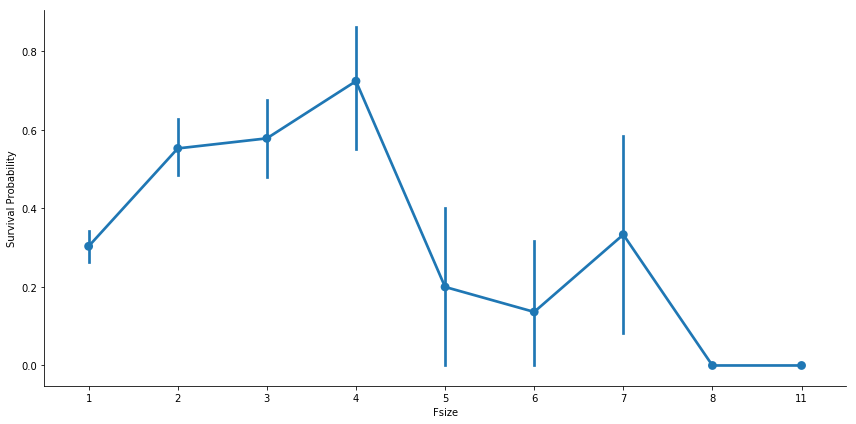

In [26]:
g = sns.factorplot(x="Fsize",y="Survived",data = train, size=6, aspect = 2)
g = g.set_ylabels("Survival Probability")

In [27]:
# Create new feature of family size
train['Single'] = train['Fsize'].map(lambda s: 1 if s == 1 else 0)
train['SmallF'] = train['Fsize'].map(lambda s: 1 if  s == 2  else 0)
train['MedF'] = train['Fsize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
train['LargeF'] = train['Fsize'].map(lambda s: 1 if s >= 5 else 0)

Text(0,0.5,'Survival Probability')

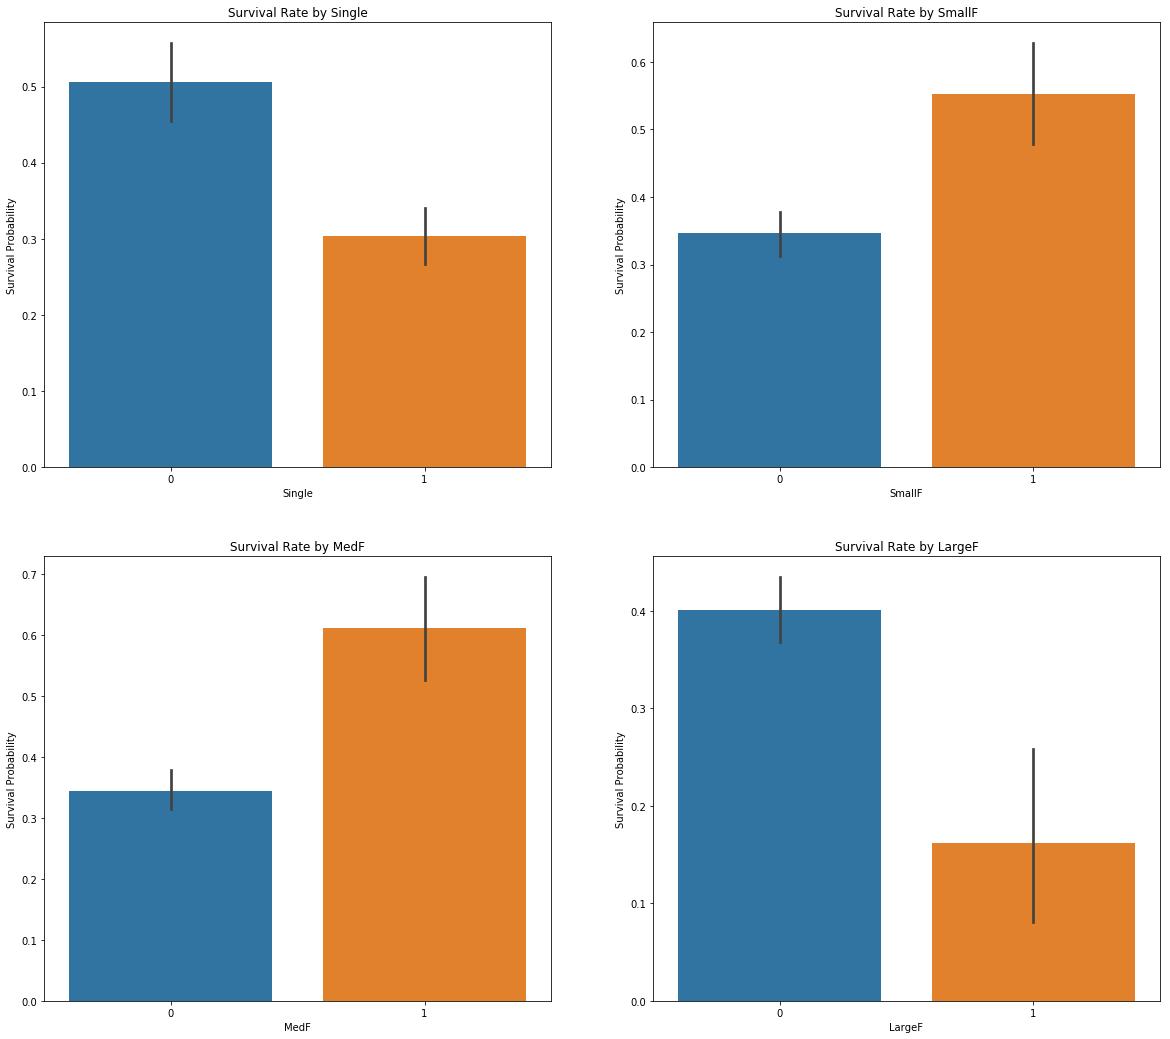

In [28]:
f,ax = plt.subplots(2,2,figsize=(20,18))

g = sns.barplot(x="Single",y="Survived",data=train, ax=ax[0,0])
ax[0,0].set_title('Survival Rate by Single')
ax[0,0].set_xlabel('Single')
ax[0,0].set_ylabel('Survival Probability')

g = sns.barplot(x="SmallF",y="Survived",data=train, ax=ax[0,1])
ax[0,1].set_title('Survival Rate by SmallF')
ax[0,1].set_xlabel('SmallF')
ax[0,1].set_ylabel('Survival Probability')

g = sns.barplot(x="MedF",y="Survived",data=train, ax=ax[1,0])
ax[1,0].set_title('Survival Rate by MedF')
ax[1,0].set_xlabel('MedF')
ax[1,0].set_ylabel('Survival Probability')

g = sns.barplot(x="LargeF",y="Survived",data=train, ax=ax[1,1])
ax[1,1].set_title('Survival Rate by LargeF')
ax[1,1].set_xlabel('LargeF')
ax[1,1].set_ylabel('Survival Probability')


**Check Point Dataset**

In [29]:
train.to_csv('check_point.csv', index=False)

### 5 Preprocessing

In [30]:
train = pd.read_csv('check_point.csv')
train.head()

,Survived,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Class1,Class2,Class3,female,male,Fsize,Single,SmallF,MedF,LargeF
0,0,22.0,1,0,7.2500,0,0,1,0,0,1,0,1,2,0,1,0,0
1,1,38.0,1,0,71.2833,1,0,0,1,0,0,1,0,2,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,1,1,0,1,1,0,0,0
3,1,35.0,1,0,53.1000,0,0,1,1,0,0,1,0,2,0,1,0,0
4,0,35.0,0,0,8.0500,0,0,1,0,0,1,0,1,1,1,0,0,0


In [31]:
train["Survived"] = train["Survived"].astype(int)

y = train["Survived"]
X = train.drop(labels = ["Survived"],axis = 1)
X.head()

,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Class1,Class2,Class3,female,male,Fsize,Single,SmallF,MedF,LargeF
0,22.0,1,0,7.2500,0,0,1,0,0,1,0,1,2,0,1,0,0
1,38.0,1,0,71.2833,1,0,0,1,0,0,1,0,2,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,0,0,1,1,0,1,1,0,0,0
3,35.0,1,0,53.1000,0,0,1,1,0,0,1,0,2,0,1,0,0
4,35.0,0,0,8.0500,0,0,1,0,0,1,0,1,1,1,0,0,0


In [32]:
sc = StandardScaler()
X_std = sc.fit_transform(X.astype(float))

### 6. Modeling

We build some models to seek the best model we can provided.
- [Support Vector Machine](https://en.wikipedia.org/wiki/Support_vector_machine)
<br> Support Vector Machine will optimize and locate a separating line, which is the line that allows for largest gap between the two classes. New data are then mapped into that same space and predicted to belong to a class based on which side of the gap they fall. <br>
<br>
- [Gradient Boosting](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
<br> Gradient Boosting generally use decision tree as "weak learners". The concept is to add predictors, and each predictor will correct its predecessor, thus finally fit new predictor to the residual errors. <br>
<br>
- Random Forest
<br> Random Forest is Ensemble of Decision Trees. Random forests are a way of averaging multiple deep decision trees, trained on different parts of the same training set, with the goal of reducing the variance. [Friedman, J., Hastie, T., & Tibshirani, R. (2001). The elements of statistical learning (Vol. 1, No. 10). New York, NY, USA:: Springer series in statistics}]. <br>
<br>
- [Logistic Regression](https://machinelearningmastery.com/logistic-regression-for-machine-learning/)
<br> Logistic regression is the go-to linear classification algorithm for two-class problems. Logistic Regression use sigmoid function that allows such real-valued number and map it into a value between 0 and 1. <br>
<br>
- [K-Nearest Neighbor (KNN)](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)
<br> An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small) <br>
<br>
- [AdaBoost](http://rob.schapire.net/papers/explaining-adaboost.pdf)
<br> Adaptive Boosting is one of Boosting algortihm, which combine "weak learners" into a weighted sum to produce the final prediction. The difference between gradient boosting, AdaBoost alter instance weights at every iteration.  <br>
<br>
- [XGboost](http://xgboost.readthedocs.io/en/latest/)
<br> Both XGBoost and Gradient Boosting Machine follows the principle of gradient boosting. XGBoost used a more regularized model formalization to control over-fitting, which gives it better performance. <br>
<br>
- [Artificial Neural Networks](http://metalab.uniten.edu.my/~abdrahim/mitm613/Jain1996_ANN%20-%20A%20Tutorial.pdf)
<br> ANNs are computing system that inspired by neural networks in brain. The system learn from some examples that we provided, generally without being programmed with any task-specific rules.<br>
<br>

To find the most significant models, we use [cross validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics), then use the score to compare those models. 

### 6.1 Support Vector Machine (SVM)

In [33]:
clf_svm = svm.SVC()
clf_svm.fit(X_std,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [34]:
scores = cross_val_score(clf_svm, X_std, y, cv=10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.78888889  0.82222222  0.7752809   0.84269663  0.84269663  0.78651685
  0.82022472  0.7752809   0.84269663  0.80681818]
Accuracy: 0.81 (+/- 0.05)


**Tune Hyperparams**

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.5, random_state=0)

In [36]:
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf_svm_tune_ = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score, n_jobs=4)
    clf_svm_tune_.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf_svm_tune_.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf_svm_tune_.cv_results_['mean_test_score']
    stds = clf_svm_tune_.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf_svm_tune_.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf_svm_tune_.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision



/home/arif/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/arif/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/arif/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/arif/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/arif/anaconda3/lib/pyt

/home/arif/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/arif/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/arif/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/arif/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/arif/anaconda3/lib/pyt

Best parameters set found on development set:

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

Grid scores on development set:

0.299 (+/-0.003) for {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
0.299 (+/-0.003) for {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}
0.299 (+/-0.003) for {'C': 0.001, 'gamma': 0.0001, 'kernel': 'rbf'}
0.299 (+/-0.003) for {'C': 0.001, 'gamma': 1e-05, 'kernel': 'rbf'}
0.794 (+/-0.053) for {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.299 (+/-0.003) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.299 (+/-0.003) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.299 (+/-0.003) for {'C': 0.1, 'gamma': 1e-05, 'kernel': 'rbf'}
0.794 (+/-0.053) for {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.299 (+/-0.003) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.299 (+/-0.003) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.299 (+/-0.003) for {'C': 0.1, 'gamma': 1e-05, 'kernel': 'rbf'}
0.831 (+/-0.065) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.812 (+/-0.063) for {'C':

In [37]:
clf_svm_tune = svm.SVC(kernel='rbf', C=10, gamma=0.01)
clf_svm_tune.fit(X_std,y)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [38]:
scores1 = cross_val_score(clf_svm_tune, X_std, y, cv=10)
print(scores1)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std() * 2))

[ 0.82222222  0.84444444  0.7752809   0.86516854  0.84269663  0.79775281
  0.82022472  0.79775281  0.87640449  0.81818182]
Accuracy: 0.83 (+/- 0.06)


In [39]:
scores1_ = cross_val_score(clf_svm_tune, X_std, y, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(scores1_)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(scores1_)))

Average Accuracy: 	 0.8260
Accuracy SD: 		 0.0300


### 6.2 Gradient Boosting

In [40]:
clf_gb = GradientBoostingClassifier()
clf_gb.fit(X_std, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [41]:
scores2= cross_val_score(clf_gb, X_std, y, cv=10)
print(scores2)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std() * 2))

[ 0.8         0.82222222  0.75280899  0.88764045  0.91011236  0.85393258
  0.83146067  0.79775281  0.85393258  0.84090909]
Accuracy: 0.84 (+/- 0.09)


In [42]:
scores2_ = cross_val_score(clf_gb, X_std, y, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(scores2_)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(scores2_)))

Average Accuracy: 	 0.8351
Accuracy SD: 		 0.0433


**Tune Hyperparams**

**Tune 1st**

In [43]:
clf_gb_tune2 = GradientBoostingClassifier(n_estimators =  1000, max_depth = 4, min_samples_split= 2,
          learning_rate=0.01)
clf_gb_tune2.fit(X_std, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [44]:
scores2_tune2= cross_val_score(clf_gb_tune2, X_std, y, cv=10)
print(scores2_tune2)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores2_tune2.mean(), scores2_tune2.std() * 2))

[ 0.81111111  0.83333333  0.75280899  0.88764045  0.91011236  0.84269663
  0.87640449  0.78651685  0.8988764   0.85227273]
Accuracy: 0.85 (+/- 0.10)


In [45]:
scores2_tune2_ = cross_val_score(clf_gb_tune2, X_std, y, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(scores2_tune2_)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(scores2_tune2_)))

Average Accuracy: 	 0.8452
Accuracy SD: 		 0.0482


### 6.3 Random Forest

In [46]:
clf_rf = RandomForestClassifier(min_samples_leaf = 10, n_estimators = 10)
clf_rf.fit(X_std, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [47]:
scores3= cross_val_score(clf_rf, X_std, y, cv=10)
print(scores3)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores3.mean(), scores3.std() * 2))

[ 0.83333333  0.82222222  0.7752809   0.84269663  0.84269663  0.80898876
  0.82022472  0.76404494  0.83146067  0.80681818]
Accuracy: 0.81 (+/- 0.05)


In [48]:
scores3_ = cross_val_score(clf_rf, X_std, y, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(scores3_)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(scores3_)))

Average Accuracy: 	 0.8138
Accuracy SD: 		 0.0376


###  6.4 Logistic Regression

In [49]:
clf_lr = LogisticRegression()
clf_lr.fit(X_std, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
scores4= cross_val_score(clf_lr, X_std, y, cv=10)
print(scores4)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores4.mean(), scores4.std() * 2))

[ 0.81111111  0.83333333  0.79775281  0.86516854  0.82022472  0.7752809
  0.79775281  0.80898876  0.83146067  0.84090909]
Accuracy: 0.82 (+/- 0.05)


In [51]:
scores4_ = cross_val_score(clf_lr, X_std, y, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(scores4_)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(scores4_)))

Average Accuracy: 	 0.8182
Accuracy SD: 		 0.0244


### 6.5 KNN Classifier

In [52]:
clf_knn = KNeighborsClassifier(n_neighbors = 10)
clf_knn.fit(X_std, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [53]:
scores5= cross_val_score(clf_lr, X_std, y, cv=10)
print(scores5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores5.mean(), scores5.std() * 2))

[ 0.81111111  0.83333333  0.79775281  0.86516854  0.82022472  0.7752809
  0.79775281  0.80898876  0.83146067  0.84090909]
Accuracy: 0.82 (+/- 0.05)


In [54]:
scores5_ = cross_val_score(clf_knn, X_std, y, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(scores5_)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(scores5_)))

Average Accuracy: 	 0.8014
Accuracy SD: 		 0.0337


### 6.6 AdaBoost Classifier

In [55]:
clf_ada = AdaBoostClassifier()
clf_ada.fit(X_std, y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [56]:
scores6= cross_val_score(clf_ada, X_std, y, cv=10)
print(scores6)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores6.mean(), scores6.std() * 2))

[ 0.77777778  0.81111111  0.78651685  0.82022472  0.78651685  0.78651685
  0.80898876  0.83146067  0.82022472  0.84090909]
Accuracy: 0.81 (+/- 0.04)


In [57]:
scores6_ = cross_val_score(clf_ada, X_std, y, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(scores6_)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(scores6_)))

Average Accuracy: 	 0.8070
Accuracy SD: 		 0.0206


### 6.7 XGBoost

In [58]:
clf_xgb = xgb.XGBClassifier(random_state = 42)
clf_xgb.fit(X_std, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [59]:
scores7= cross_val_score(clf_xgb, X_std, y, cv=10)
print(scores7)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores7.mean(), scores7.std() * 2))

[ 0.78888889  0.77777778  0.76404494  0.88764045  0.88764045  0.82022472
  0.85393258  0.78651685  0.84269663  0.85227273]
Accuracy: 0.83 (+/- 0.09)


In [60]:
scores7_ = cross_val_score(clf_xgb, X_std, y, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(scores7_)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(scores7_)))

Average Accuracy: 	 0.8262
Accuracy SD: 		 0.0430


**Tune Hyperparams**

In [61]:
params = {'max_depth':(5, 10, 25, 50), 
          'n_estimators':(50, 200, 500, 1000)} 

clf_xgb_tune_ = GridSearchCV(clf_xgb, params, n_jobs=4,
                            cv=3, verbose=1, scoring='accuracy')
clf_xgb_tune_.fit(X_std, y)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=4)]: Done  48 out of  48 | elapsed:   10.1s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'max_depth': (5, 10, 25, 50), 'n_estimators': (50, 200, 500, 1000)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [62]:
clf_xgb_tune_.best_estimator_.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)>

In [63]:
clf_xgb_tune = xgb.XGBClassifier(random_state = 42, learning_rate = 0.1, max_depth = 5, n_estimators=50, n_jobs=4)
clf_xgb_tune.fit(X_std, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=4, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [64]:
scores7_tune= cross_val_score(clf_xgb_tune, X_std, y, cv=10)
print(scores7_tune)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores7_tune.mean(), scores7_tune.std() * 2))

[ 0.78888889  0.81111111  0.76404494  0.87640449  0.88764045  0.84269663
  0.87640449  0.78651685  0.85393258  0.875     ]
Accuracy: 0.84 (+/- 0.09)


In [65]:
scores7_tune_ = cross_val_score(clf_xgb_tune, X_std, y, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(scores7_tune_)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(scores7_tune_)))

Average Accuracy: 	 0.8363
Accuracy SD: 		 0.0428


### 6.8 Artificial Neural Network (ANN)

In [66]:
model = Sequential()
model.add(Dense(units = 18, kernel_initializer = 'random_uniform', activation = 'relu', input_dim = 17))
model.add(Dense(units = 14, kernel_initializer = 'random_uniform', activation = 'relu'))
model.add(Dense(units = 6, kernel_initializer = 'random_uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'random_uniform', activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_std, y, batch_size = 30, epochs = 200)

Epoch 1/200
891/891 [==============================] - 0s - loss: 0.6915 - acc: 0.6105     
Epoch 2/200
891/891 [==============================] - 0s - loss: 0.6878 - acc: 0.6162     
Epoch 3/200
891/891 [==============================] - 0s - loss: 0.6778 - acc: 0.6162     
Epoch 4/200
891/891 [==============================] - 0s - loss: 0.6408 - acc: 0.7407     
Epoch 5/200
891/891 [==============================] - 0s - loss: 0.5521 - acc: 0.8081     
Epoch 6/200
891/891 [==============================] - 0s - loss: 0.4658 - acc: 0.8114     
Epoch 7/200
891/891 [==============================] - 0s - loss: 0.4389 - acc: 0.8137     
Epoch 8/200
891/891 [==============================] - 0s - loss: 0.4291 - acc: 0.8114     
Epoch 9/200
891/891 [==============================] - 0s - loss: 0.4256 - acc: 0.8171     
Epoch 10/200
891/891 [==============================] - 0s - loss: 0.4218 - acc: 0.8182     
Epoch 11/200
891/891 [==============================] - 0s - loss: 0.4184 - acc

891/891 [==============================] - 0s - loss: 0.3823 - acc: 0.8474     
Epoch 89/200
891/891 [==============================] - 0s - loss: 0.3816 - acc: 0.8462     
Epoch 90/200
891/891 [==============================] - 0s - loss: 0.3816 - acc: 0.8462     
Epoch 91/200
891/891 [==============================] - 0s - loss: 0.3814 - acc: 0.8462     
Epoch 92/200
891/891 [==============================] - 0s - loss: 0.3810 - acc: 0.8485     
Epoch 93/200
891/891 [==============================] - 0s - loss: 0.3816 - acc: 0.8485     
Epoch 94/200
891/891 [==============================] - 0s - loss: 0.3824 - acc: 0.8485     
Epoch 95/200
891/891 [==============================] - 0s - loss: 0.3806 - acc: 0.8507     
Epoch 96/200
891/891 [==============================] - 0s - loss: 0.3808 - acc: 0.8485     
Epoch 97/200
891/891 [==============================] - 0s - loss: 0.3798 - acc: 0.8462     
Epoch 98/200
891/891 [==============================] - 0s - loss: 0.3802 - acc: 0.

891/891 [==============================] - 0s - loss: 0.3640 - acc: 0.8597     
Epoch 176/200
891/891 [==============================] - 0s - loss: 0.3632 - acc: 0.8608     
Epoch 177/200
891/891 [==============================] - 0s - loss: 0.3631 - acc: 0.8620     
Epoch 178/200
891/891 [==============================] - 0s - loss: 0.3624 - acc: 0.8620     
Epoch 179/200
891/891 [==============================] - 0s - loss: 0.3631 - acc: 0.8563     
Epoch 180/200
891/891 [==============================] - 0s - loss: 0.3639 - acc: 0.8586     
Epoch 181/200
891/891 [==============================] - 0s - loss: 0.3640 - acc: 0.8608     
Epoch 182/200
891/891 [==============================] - 0s - loss: 0.3629 - acc: 0.8620     
Epoch 183/200
891/891 [==============================] - 0s - loss: 0.3629 - acc: 0.8597     
Epoch 184/200
891/891 [==============================] - 0s - loss: 0.3622 - acc: 0.8608     
Epoch 185/200
891/891 [==============================] - 0s - loss: 0.3618

In [67]:
scores8 = model.evaluate(X_std, y)
print("Loss metric: \t {0:.4f}".format(scores8[0]))
print("Accuracy metric: \t{0:.4f}".format(scores8[1]))

 32/891 [>.............................] - ETA: 0sLoss metric: 	 0.3579
Accuracy metric: 	0.8608


### 6.9 Result Modeling

In [68]:
classifier_update = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Gradient Boosting', 'Random Forest', 
            'Logistic Regression', 'KNN', 
              'Adaboost', 'XGBoost', 'ANN'],
    'Score': [scores1.mean(), scores2_tune2.mean(), scores3.mean(), 
              scores4.mean(), scores5.mean(), 
              scores6.mean(), scores7_tune.mean(), scores8[1]]})
classifier_update['Score'] = np.round(classifier_update['Score'], decimals = 4)
classifier_update.sort_values(by='Score', ascending=False)

,Model,Score
7,ANN,0.8608
1,Gradient Boosting,0.8452
6,XGBoost,0.8363
0,Support Vector Machines,0.8260
3,Logistic Regression,0.8182
4,KNN,0.8182
2,Random Forest,0.8148
5,Adaboost,0.8070


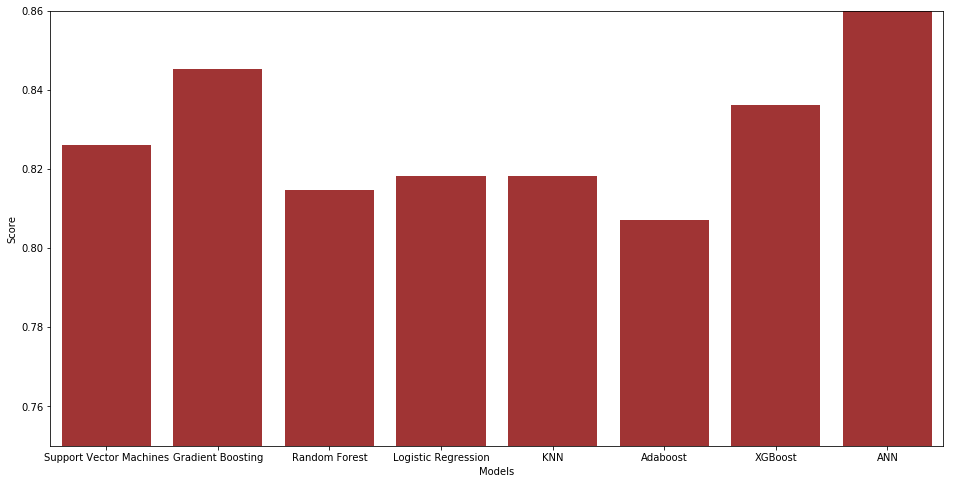

In [69]:
plt.figure(figsize=(16, 8))

x = classifier_update['Model']
y = classifier_update['Score']
sns.barplot(x, y, color='firebrick')
plt.ylabel("Score")
plt.xlabel("Models")
plt.ylim(0.75, 0.86);

### 1. Testing

In [70]:
##Load Data
test = pd.read_csv("dataset/test.csv")

## Fill Age with the median age of similar rows according to Pclass

index_NaN_age_test = list(test["Age"][test["Age"].isnull()].index)

for i in index_NaN_age_test :
    age_med_test = test["Age"].median()
    age_pred_test = test["Age"][((test['Pclass'] == test.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred) :
        test['Age'].iloc[i] = age_pred_test
    else :
        test['Age'].iloc[i] = age_med_test
        

## Before we fill Embarked with zero, we change Embarked values to one hot encoding 
test["Embarked"] = test["Embarked"].astype("category")
test = pd.get_dummies(test, columns = ["Embarked"],prefix="Embarked")

## Fill Embarked with zero value
test['Embarked_C'] = test['Embarked_C'].fillna(0)
test['Embarked_Q'] = test['Embarked_Q'].fillna(0)
test['Embarked_S'] = test['Embarked_S'].fillna(0) 

test["Pclass"] = test["Pclass"].map({1: 'Class1', 2: 'Class2', 3: 'Class3'})

Pclass_test = pd.get_dummies(test['Pclass'],prefix = 'Pclass' )
test = test.assign(Class1=Pclass_test['Pclass_Class1'], Class2=Pclass_test['Pclass_Class2'], 
                     Class3=Pclass_test['Pclass_Class3'])
test = test.drop(['Pclass'], axis=1)

Sex_test = pd.get_dummies(test['Sex'],prefix = 'Sex' )
test = test.assign(male=Sex_test['Sex_male'], female=Sex_test['Sex_female'])
test = test.drop(['Sex'], axis=1)

#drop Cabin and Name column from data test
test = test.drop(labels=['Cabin'], axis=1)
test = test.drop(labels=['Name'], axis=1)
test = test.drop(['Ticket'], axis=1)

test["Fsize"] = test["SibSp"] + test["Parch"] + 1

# Create new feature of family size
test['Single'] = test['Fsize'].map(lambda s: 1 if s == 1 else 0)
test['SmallF'] = test['Fsize'].map(lambda s: 1 if  s == 2  else 0)
test['MedF'] = test['Fsize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
test['LargeF'] = test['Fsize'].map(lambda s: 1 if s >= 5 else 0)

test.head()

/home/arif/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,PassengerId,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Class1,Class2,Class3,female,male,Fsize,Single,SmallF,MedF,LargeF
0,892,34.5,0,0,7.8292,0,1,0,0,0,1,0,1,1,1,0,0,0
1,893,47.0,1,0,7.0000,0,0,1,0,0,1,1,0,2,0,1,0,0
2,894,62.0,0,0,9.6875,0,1,0,0,1,0,0,1,1,1,0,0,0
3,895,27.0,0,0,8.6625,0,0,1,0,0,1,0,1,1,1,0,0,0
4,896,22.0,1,1,12.2875,0,0,1,0,0,1,1,0,3,0,0,1,0


In [71]:
test['Fare'] = test.Fare.fillna(test['Fare'].median())

In [73]:
X_test = test.drop('PassengerId', axis = 1)

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)
X_test_std = sc.transform(X_test)

In [75]:
y_pred = model.predict(X_test_std)
y_pred = (y_pred > 0.5)
y_pred = pd.Series(list(y_pred))

submission = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": y_pred})
submission['Survived'] = submission['Survived'].astype(int)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [76]:
# submission.to_csv('submission.csv', index = False)

### thank you **Yassine Ghouzam and Figarri Keisha** for the insight

Created by $\textbf{Arif Romadhan}$ <br>
email : arifromadhan19@gmail.com